<a href="https://colab.research.google.com/github/freshiwe/More-ML-projects/blob/main/Face_detection_and_Recognition(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pytubefix # Install the 'pytubefix' library using pip.
import pytubefix
from IPython.display import Video
from pytubefix import YouTube

In [17]:

import cv2
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid

In [4]:
print("torch version : ", torch.__version__)
print("pytube version : ", pytubefix.__version__)
print("torchvision version : ", torchvision.__version__)
print("cv2 version : ", cv2.__version__)

!python --version

torch version :  2.5.1+cu124
pytube version :  8.12.1
torchvision version :  0.20.1+cu124
cv2 version :  4.10.0
Python 3.11.11


In [6]:
#connect with google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import os
os.makedirs('/content/drive/MyDrive/Ronaldo_and_Mr_best', exist_ok=True)


In [12]:
video_url = 'https://www.youtube.com/watch?v=aDF_ESN80r8&t=5s'
yt = YouTube(video_url)
stream = yt.streams.get_highest_resolution()
video = stream.download('/content/drive/MyDrive/Ronaldo_and_Mr_best', filename='Ronaldo_mrbeast.mp4')


In [13]:
# Display the video
Video(video, width=400)

In [13]:
def cut_video(input_file,output_file,start_time,duration):
    """
    Cuts a portion of the video.

    :parameter input_file: Path to the input video file.
    :parameter output_file: Path to the output video file.
    :parameter start_time: Start time of the cut in seconds or in `HH:MM:SS` format.
    :parameter duration: Duration of the cut in seconds or in `HH:MM:SS` format.
    """
    # Import the subprocess module
    import subprocess
    command = [
        "ffmpeg",
        "-ss",
        str(start_time),
        "-i",
        input_file,
        "-t",
        str(duration),
        "-c",
        "copy",
        output_file,
    ]
    subprocess.run(command)

In [14]:
import os

output_video_name = "project.mp4"

# Use os.path.join to construct the output video path correctly
output_video = os.path.join(os.path.dirname(video), output_video_name)

print(output_video)

/content/drive/MyDrive/Ronaldo_and_Mr_best/project.mp4


In [15]:
start_time = "00:00:00"  # Start at 00 seconds
duration = "00:03:00"  # Cut 1 minute

# Call cut_video function
cut_video(video,output_video,start_time,duration)

**Exploring and Preparing the Data**

In [18]:
video_capture = cv2.VideoCapture(output_video)

if not video_capture.isOpened():
    print("Error: Could not open video.")
else:
    frame_rate = video_capture.get(cv2.CAP_PROP_FPS)
    frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Frame rate: {frame_rate}")
    print(f"Total number of frames: {frame_count}")

Frame rate: 25.0
Total number of frames: 4500


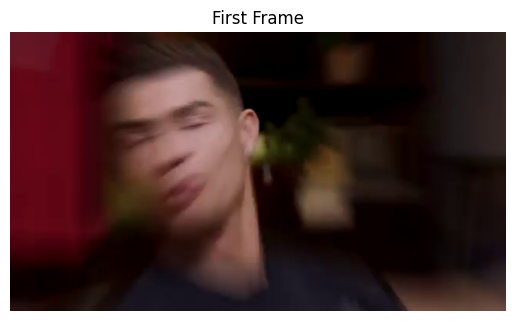

In [20]:
ret, first_frame = video_capture.read()

if ret:
    plt.imshow(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB))
    plt.title("First Frame")
    plt.axis("off")
    plt.show()
else:
    print("Error: Could not read frame.")

In [21]:
import os
frames_dir = os.path.join("Ronaldo_and_Mr_best", "extracted_frames") # Use os.path.join to combine paths

# Use os.makedirs to create the directory instead of frames_dir.mkdir
os.makedirs(frames_dir, exist_ok=True)
print(frames_dir)

Ronaldo_and_Mr_best/extracted_frames


**Showing Every fifth frame from the Video**

In [22]:
# --- ipython-input-29-d54fa98fb7b3 ---
import os  # Import the os module

interval = frame_rate * 0.20  # Extract every fifth frame from the video
frame_count = 0

print("Start extracting individual frames...")
while True:
    # read next frame from the video_capture
    ret, frame = video_capture.read()
    if not ret:
        print("Finished!")
        break  # Break the loop if there are no more frames

    # Save frames at every 'interval' frames
    if frame_count % interval == 0:
        # Use os.path.join to create the frame path
        frame_path = os.path.join(frames_dir, f"frame_{frame_count}.jpg")
        cv2.imwrite(frame_path, frame)

    frame_count += 1

video_capture.release()

Start extracting individual frames...
Finished!


In [23]:

n_extraced_frames = len(os.listdir(frames_dir)) # Use os.listdir() to get the files in the directory

print(f"We saved {n_extraced_frames} frames.")

We saved 900 frames.


In [24]:
from pathlib import Path # Import the Path object from pathlib

def display_sample_images(dir_path, sample=5):
    image_list = []
    # Convert dir_path to a Path object
    dir_path = Path(dir_path)
    images = sorted(dir_path.iterdir())
    if images:
        sample_images = images[:sample]
        for sample_image in sample_images:
            image = read_image(str(sample_image))

            # Define resizing transformation that resizes to 240 x 240
            resize_transform = transforms.Resize((240,240))
            # Resize image by using `resize_transform`
            image = resize_transform(image)
            image_list.append(image)
    grid = make_grid(image_list, nrow=5)
    image = to_pil_image(grid)
    return image

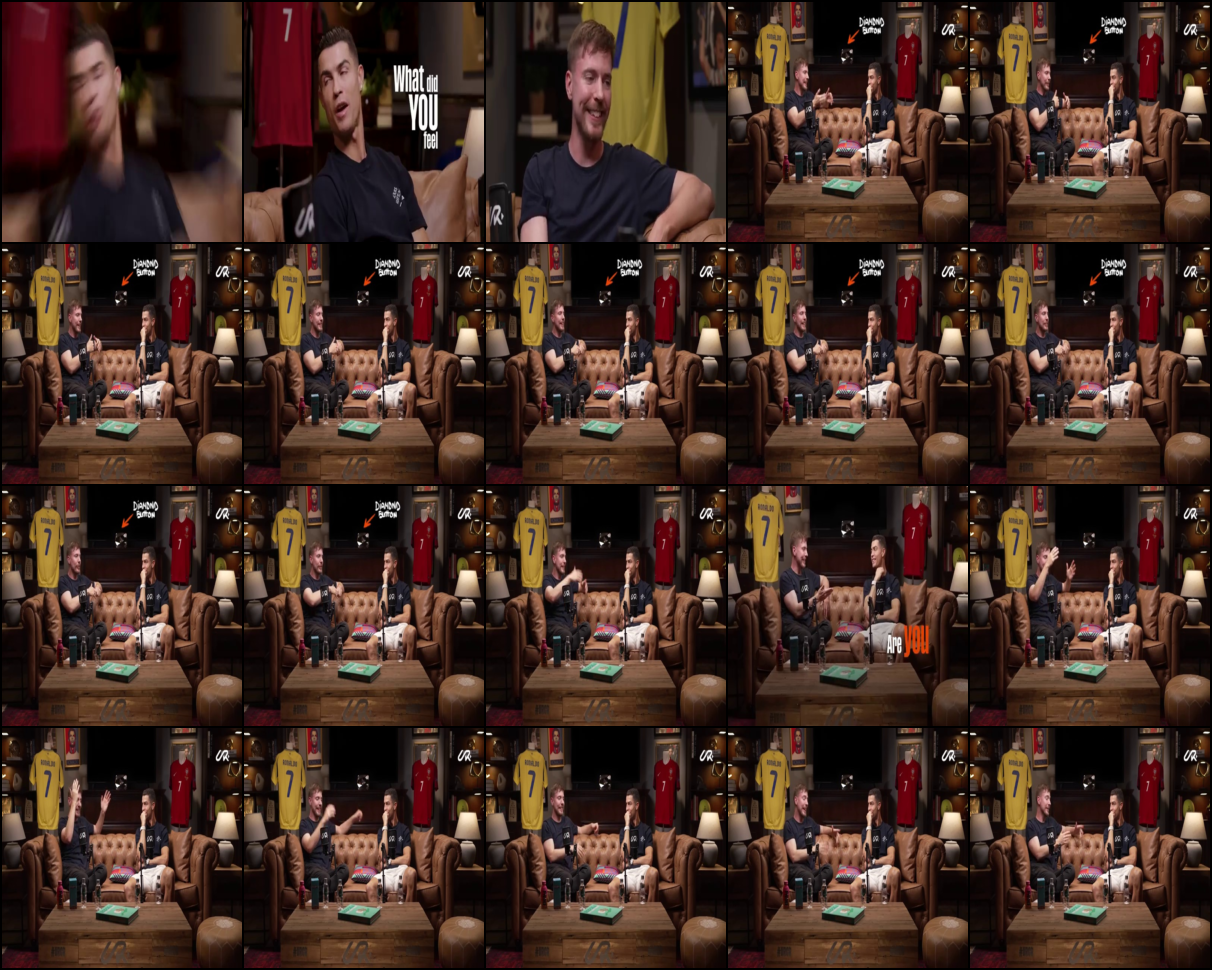

In [25]:
# Call function `display_sample_images` on `frames_dir`
display_sample_images(frames_dir,sample = 20)

In [7]:
!pip install facenet-pytorch # Install the facenet-pytorch package using pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

In [1]:
import shutil
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import PIL
import torch
import torchvision
from facenet_pytorch import MTCNN
from PIL import Image
from torchvision.utils import make_grid

In [2]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Using {device} device.")

Using cuda device.


In [4]:
mtcnn = MTCNN(device=device, keep_all=True, min_face_size=60, post_process=False)

print(mtcnn)


MTCNN(
  (pnet): PNet(
    (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=10)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=16)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (prelu3): PReLU(num_parameters=32)
    (conv4_1): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
    (softmax4_1): Softmax(dim=1)
    (conv4_2): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (rnet): RNet(
    (conv1): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=28)
    (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=48)
    (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv3): Conv2d(48, 64,

In [26]:
curr_work_dir = Path.cwd()

print(curr_work_dir)


/content


In [29]:
extracted_frames_dir = '/content/Ronaldo_and_Mr_best/extracted_frames'

print(extracted_frames_dir)

/content/Ronaldo_and_Mr_best/extracted_frames


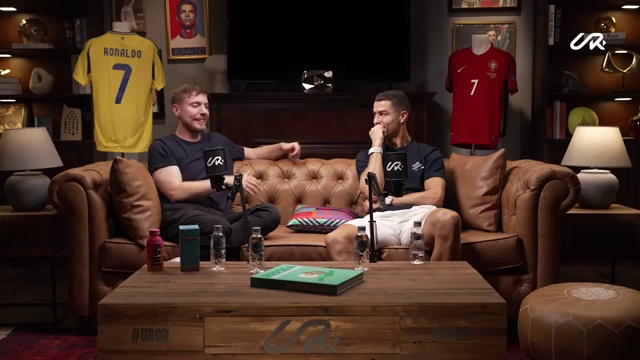

In [53]:
import os

sample_image_filename = "frame_1065.jpg"
sample_image_path = os.path.join(extracted_frames_dir, sample_image_filename) # Use os.path.join to create the path

sample_image = Image.open(sample_image_path)
sample_image

**Drawing Bounding Boxes for detected Faces**

In [54]:
boxes, probs = mtcnn.detect(sample_image)

print("boxes type:", type(boxes))
print("probs type:", type(probs))

boxes type: <class 'numpy.ndarray'>
probs type: <class 'numpy.ndarray'>


In [55]:
print(boxes)
print(boxes.shape)

[[300.18280029296875 157.01222229003906 356.52801513671875
  214.3552703857422]
 [370.5273132324219 98.79176330566406 398.5715637207031
  138.86074829101562]
 [180.2052459716797 92.34689331054688 207.8751220703125
  128.18479919433594]]
(3, 4)


In [56]:
number_of_detected_faces = len(boxes)

print(number_of_detected_faces)

3


In [57]:
num_faces = len(probs[probs > 0.70])

print(num_faces)

3


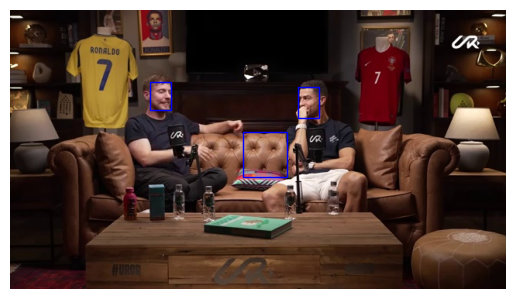

In [58]:
fig, ax = plt.subplots()
ax.imshow(sample_image)

for box in boxes:
    rect = plt.Rectangle(
        (box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color="blue"
    )
    ax.add_patch(rect)
plt.axis("off");

In [60]:
num_faces = len(probs[probs > 0.9])

print(num_faces)

2


2


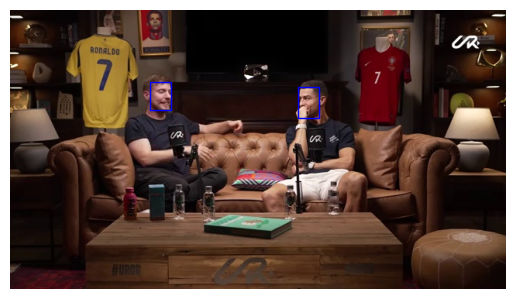

In [82]:
# Filter boxes and probs based on probability > 0.9
if probs is not None:
  filtered_boxes = boxes[probs > 0.9]
  filtered_probs = probs[probs > 0.9]
  filtered_landmarks = landmarks[probs > 0.9]
  num_faces = len(filtered_boxes)
  print(num_faces)

  fig, ax = plt.subplots()
  ax.imshow(sample_image)

  for box in filtered_boxes:
      rect = plt.Rectangle(
          (box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color="blue"
      )
      ax.add_patch(rect)
  plt.axis("off")
else:
  print("No faces detected")

**Extracting Facial Landmarks**

Initial number of faces detected: 3
Number of faces after filtering: 3


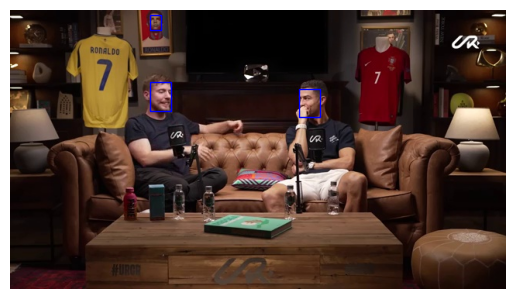

Filtered landmarks shape: (3, 5, 2)
boxes type: <class 'numpy.ndarray'>
probs type: <class 'numpy.ndarray'>
landmarks type: <class 'numpy.ndarray'>


In [89]:


if boxes is not None and probs is not None:
    print("Initial number of faces detected:", len(boxes))

    # Filter boxes and probs based on probability > 0.9
    filtered_boxes = boxes[probs > 0.9]
    filtered_probs = probs[probs > 0.9]
    filtered_landmarks = landmarks[probs > 0.9]

    num_faces = len(filtered_boxes)
    print("Number of faces after filtering:", num_faces)

    fig, ax = plt.subplots()
    ax.imshow(sample_image)

    for box in filtered_boxes:
        rect = plt.Rectangle(
            (box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color="blue"
        )
        ax.add_patch(rect)
    plt.axis("off")
    plt.show()

    print("Filtered landmarks shape:", filtered_landmarks.shape)
else:
    print("No faces detected")

print("boxes type:", type(boxes))
print("probs type:", type(probs))
print("landmarks type:", type(landmarks))


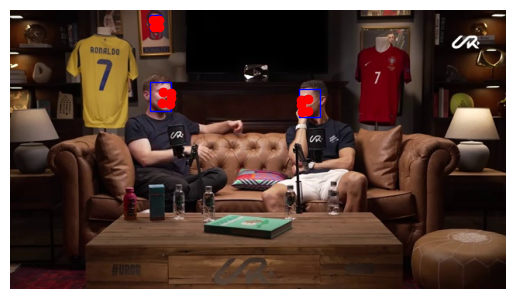

In [90]:
fig, ax = plt.subplots()
ax.imshow(sample_image)

for box, landmark in zip(boxes,landmarks):
    rect = plt.Rectangle(
        (box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color="blue"
    )
    ax.add_patch(rect)
    for point in landmark:
        ax.plot(point[0], point[1], marker="o", color="red")
plt.axis("off");

In [95]:
import zipfile
import os

folder_path = '/content/Ronaldo_and_Mr_best/extracted_frames'
zip_path = '/content/download_folder.zip'

with zipfile.ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            zipf.write(os.path.join(root, file))


In [96]:
from google.colab import files

files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>